## Петропавлов Денис Михайлович ИУ5-24м Вариант №9 

### Задача:
#### Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных с использованием библиотек Matplotlib и Seaborn. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков? Проведите корреляционный анализ. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

#### Для студентов группы ИУ5-24М - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

#### Набор данных:
https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [207]:
data = pd.read_csv('C:/Dataset/houses_to_rent_v2.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [208]:
data.shape

(8231, 13)

In [209]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

city - 0
area - 0
rooms - 0
bathroom - 0
parking spaces - 0
floor - 0
animal - 0
furniture - 0
hoa (R$) - 0
rent amount (R$) - 0
property tax (R$) - 0
fire insurance (R$) - 0
total (R$) - 0


Анализ множества значений параметра furniture использований каждого

In [210]:
data['furniture'].value_counts()

not furnished    5979
furnished        2252
Name: furniture, dtype: int64

#### Catplot
Самый простой и наглядный способ проанализировать выборку - построить на ее области диаграмму. За это в библиотеке Seaborn отвечает функция catplot. Пример: обставлена мебелью или нет

Text(0.5, 1, 'Furniture')

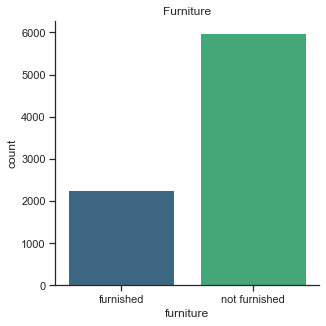

In [211]:
sns.catplot(x='furniture',kind='count',data=data,height=4.5,palette='viridis')
plt.title('Furniture')

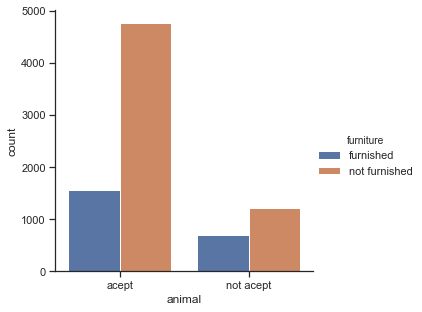

In [212]:
sns.catplot(x='animal',
kind='count',data=data,height=4.5,hue='furniture')

Так же можно отсортировать порядок вывода, толщину столбцов и цветовую палитру. Пример: кол-во домов, сдающихся в городах

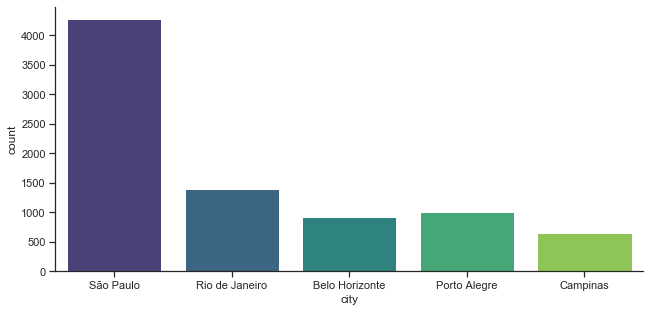

In [213]:
sns.catplot(x='city',kind='count',data=data,height=4.5,aspect=2,palette='viridis',
            order=["São Paulo","Rio de Janeiro","Belo Horizonte","Porto Alegre",
                   "Campinas"],)

Одна из главных проблем анализа данных - их формат. Для дальнейшего анализа необходимо перевести их в "цифру". Как это было сделано - показано ниже:

In [214]:
data['city'].replace({'São Paulo':'1','Rio de Janeiro':'2','Belo Horizonte':'3','Porto Alegre':'4','Campinas':'5'},inplace=True)
data['animal'].replace({'acept':'1','not acept':'0'},inplace=True)
data['furniture'].replace({'not furnished':'0','furnished':'1'},inplace=True)

data['city'] = data['city'].astype('int64')
data['animal'] = data['animal'].astype('int64')
data['furniture'] = data['furniture'].astype('int64')

In [215]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,1,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,1,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,4,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,4,51,2,1,0,2,1,0,270,1112,22,17,1421
4,1,25,1,1,0,1,0,0,0,800,25,11,836


Убедимся, что иземены не только значения, но и тип данных.

In [216]:
data.dtypes

city                   int64
area                   int64
rooms                  int64
bathroom               int64
parking spaces         int64
floor                  int64
animal                 int64
furniture              int64
hoa (R$)               int64
rent amount (R$)       int64
property tax (R$)      int64
fire insurance (R$)    int64
total (R$)             int64
dtype: object

Корреляционная матрица - главный инструмент при анализе взаимосвязей в большой выборке. Значения близкие по модулю к 1 означают высокую степень корреляции, т.е. высокую степень зависимости. Функция heatmap позволяет помимо построения матрицы выделить ячейки цветом - цветовая карта еще нагляднее показывает степень близости, облегчая визуальный анализ выборок с большим объемом параметров.

Видно, что значимая корреляция у нас между признаками hoa и total, rent amount и fire insurance

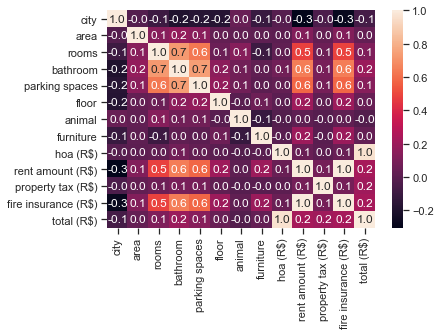

In [218]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')

#### Violinplot
Еще одна диаграмма отображающая разброс значений параметра и его границы

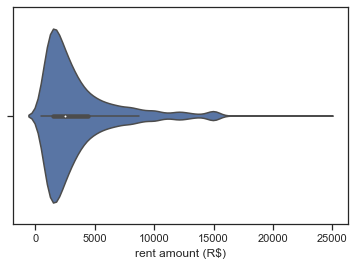

In [203]:
sns.violinplot(x=data['rent amount (R$)'])